In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
tmax = 2 # max time
t = np.linspace(0, tmax, 100) 

In [4]:
# ODE function
def myfunc(t, Y, ep):
    y, yp = Y
    ypp = -1/(1 + ep*y)**2
    return [yp, ypp]
# Because solve_ivp wants a function with only two inputs, create an auxiliary function to pass any arguments
ep = 0.2
f = lambda t, Y: myfunc(t, Y, ep)

# initial condition
Y0 = [0, 1]
sol = solve_ivp(f, [0, tmax], Y0, dense_output=True)

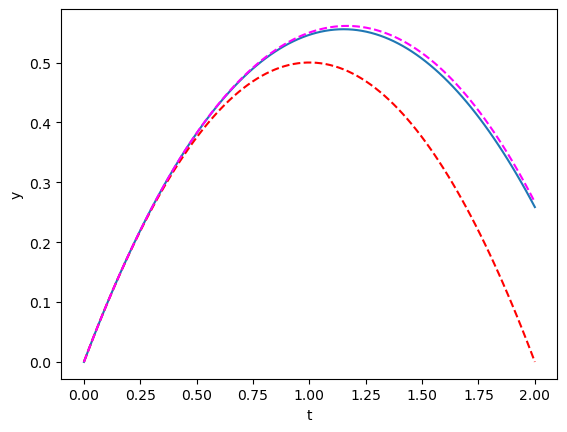

In [8]:
# Re-interpolate the solution on a dense mesh
yy = sol.sol(t)
# Plot asymptotic solutions
y0 = -1/2*t**2 + t
y1 = -1/12*t**4 + 1/3*t**3

plt.plot(t, yy[0,:])
plt.plot(t, y0, '--', color = 'red')
plt.plot(t, y0 + ep*y1, '--', color = 'magenta')
plt.xlabel('t');
plt.ylabel('y');

In [6]:
sol.sol(0.4)

array([0.32368387, 0.62606676])